<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Airline Tweets Sentiment Analysis Lab

_Authors: Phillippa Thomson (NYC)_

---

You are going to be analyzing tweets about airlines.  These have been hand-tagged with sentiment.  There are three categories: positive, neutral, and negative.

Use VADER to calculate sentiment for each tweet, and see if you can correctly predict the hand-tagged sentiment.

What is the accuracy?  Print out a heatmap to see where your model performs well, and where it performs poorly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_csv("../../data/Tweets.csv", encoding_errors='ignore')

In [3]:
tweets.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


### 1. Preview the airline_sentiment column.
- What percentage of reviews are positive, neutral, and negative?

In [4]:
tweets['airline_sentiment'].value_counts() / len(tweets)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

### 2. Load in the Sentiment IntensityAnalyzer from Vader and add compound, negative, neutral, and positive scores into the DataFrame.

In [5]:
import nltk
nltk.downloader.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound= []
neg = []
neu = []
pos = []
for tweet in tweets['text']:
    sent = sia.polarity_scores(tweet)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dlasisi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
tweets['compound'] = compound
tweets['neg'] = neg
tweets['neu'] = neu
tweets['pos'] = pos

In [7]:
tweets.head()

,airline_sentiment,airline,text,compound,neg,neu,pos
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.0000,0.000,1.000,0.0
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.0000,0.000,1.000,0.0
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0.0000,0.000,1.000,0.0
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,-0.5984,0.246,0.754,0.0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.5829,0.321,0.679,0.0


### 3. Store airline_sentiment in y to use as labels and create an appropriate feature matrix, X.

In [8]:
y = tweets['airline_sentiment']
X = tweets[['compound', 'neg', 'neu', 'pos']]

### 4. Fit a model of your choice to predict airline_sentient and cross-validate.

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

In [10]:
rf.fit(X,y)

RandomForestClassifier()

In [11]:
cross_val_score(rf, X, y)
# versus the baseline (63%), this is a little weak.

array([0.66803279, 0.66427596, 0.67349727, 0.69808743, 0.68203552])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.30,
                                                        random_state=14)
rf.fit(X_train,y_train)

RandomForestClassifier()

### 5. Display the confusion matrix.
- What reviews are difficult to identify?

Text(0.5, 1.0, 'Confusion Matrix')

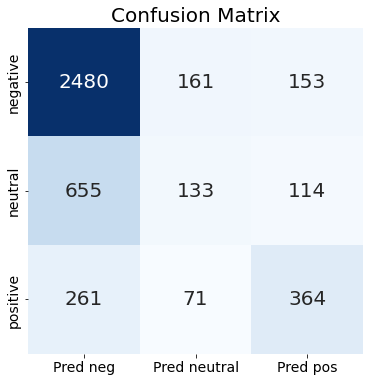

In [13]:

conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)


### 6. Print the classification report and discuss the characteristics of the model.

In [14]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.73      0.89      0.80      2794
     neutral       0.36      0.15      0.21       902
    positive       0.58      0.52      0.55       696

    accuracy                           0.68      4392
   macro avg       0.56      0.52      0.52      4392
weighted avg       0.63      0.68      0.64      4392



The model does ok with negative tweets (the predominant class) but quite poorly with neutral.

To put this in perspective, human concordance, the probability that two people assign the same sentiment to an observation is usually around 70%-80% our baseline is at 63%. Even small increases in accuracy quickly move us towards a theoretical maximum in performance.